In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import timedelta,datetime
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import requests
import os
from dotenv import load_dotenv

In [2]:
#dates for data required
start_date = "2025-03-06"
end_date = datetime.now().strftime('%Y-%m-%d')

In [3]:

#load stock data
nvidia_stock = yf.Ticker("NVDA")
stock_data= nvidia_stock.history(start=start_date, end = end_date)
stock_data.reset_index(inplace=True)

In [4]:
stock_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2025-03-06 00:00:00-05:00,113.519557,115.339389,110.209863,110.559830,321181900,0.00,0.0
1,2025-03-07 00:00:00-05:00,111.239772,113.469570,107.550108,112.679642,341755500,0.00,0.0
2,2025-03-10 00:00:00-04:00,109.889891,111.839709,105.450297,106.970161,366487400,0.00,0.0
3,2025-03-11 00:00:00-04:00,106.980159,112.229676,104.760361,108.750000,354865700,0.00,0.0
4,2025-03-12 00:00:00-04:00,114.120003,116.760002,112.879997,115.739998,323857500,0.01,0.0
5,2025-03-13 00:00:00-04:00,117.029999,117.760002,113.790001,115.580002,299033100,0.00,0.0
6,2025-03-14 00:00:00-04:00,118.610001,121.879997,118.150002,121.669998,277593500,0.00,0.0
7,2025-03-17 00:00:00-04:00,122.739998,122.889999,118.029999,119.529999,255501500,0.00,0.0
8,2025-03-18 00:00:00-04:00,118.000000,119.019997,114.540001,115.430000,299686900,0.00,0.0
9,2025-03-19 00:00:00-04:00,117.269997,120.449997,115.680000,117.519997,273426200,0.00,0.0


In [5]:
# Load environment variables from .env file
load_dotenv()
api_key = os.environ.get("API_KEY")

In [6]:
#News API
url = 'https://newsapi.org/v2/everything'
params = {
    'q': 'Nvidia',
    'from': (datetime.now() - timedelta(days=28)).strftime('%Y-%m-%d'),  # Get articles from the last 30 days
    'sortBy': 'relevancy',
    'apiKey': api_key,
    'pageSize': 100,  # Maximum number of results per page
    'language': 'en'
}

In [7]:
#make the api call
response=requests.get(url,params=params)
data=response.json()

#check for errors and convert to df
# Check for errors
if data['status'] != 'ok':
    raise Exception(f"NewsAPI error: {data['message']}")

# Extract articles
articles = data['articles']

# Convert to DataFrame
news_data = pd.DataFrame(articles)
news_data = news_data[['publishedAt', 'title']]
news_data.columns = ['date', 'headline']
     

In [8]:
news_data

,date,headline
0,2025-03-18T19:26:27Z,Nvidia says ‘the age of generalist robotics is...
1,2025-03-19T18:28:52Z,Here are all the Nvidia DGX Spark versions so far
2,2025-03-18T17:54:11Z,GM taps Nvidia to boost its embattled self-dri...
3,2025-03-15T11:00:09Z,What to Expect at Nvidia GTC 2025
4,2025-03-20T21:00:53Z,Nvidia’s RTX 5060 May Have Just Joined the Que...
...,...,...
88,2025-04-03T23:28:00Z,This HP Omen gaming desktop dropped to $780 af...
89,2025-03-19T12:06:30Z,The Dell G16 gaming laptop with RTX 4060 is un...
90,2025-03-10T12:01:02Z,"AMD’s RX 9070 XT beats Nvidia’s $1,000+ GPU, b..."
91,2025-04-02T22:04:14Z,Nvidia RTX 5070 available at suggested price a...


In [9]:
#preprocess the headlines
nltk.download('punkt_tab')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words= word_tokenize(text)# Break the text into individual words
    words = [word for word in words if word.isalpha()] # Keep only alphabetic words (remove numbers, punctuation, etc.)
    words = [word for word in words if word.lower() not in stop_words] # Remove common words like "the", "is", "and" (stopwords)
    return ' '.join(words)# Join the remaining words back into a single string with spaces


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/peekaboo645/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/peekaboo645/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
news_data['clean_headlines']= news_data['headline'].apply(preprocess_text)
news_data

,date,headline,clean_headlines
0,2025-03-18T19:26:27Z,Nvidia says ‘the age of generalist robotics is...,Nvidia says age generalist robotics
1,2025-03-19T18:28:52Z,Here are all the Nvidia DGX Spark versions so far,Nvidia DGX Spark versions far
2,2025-03-18T17:54:11Z,GM taps Nvidia to boost its embattled self-dri...,GM taps Nvidia boost embattled projects
3,2025-03-15T11:00:09Z,What to Expect at Nvidia GTC 2025,Expect Nvidia GTC
4,2025-03-20T21:00:53Z,Nvidia’s RTX 5060 May Have Just Joined the Que...,Nvidia RTX May Joined Queue Hardware Delayed Week
...,...,...,...
88,2025-04-03T23:28:00Z,This HP Omen gaming desktop dropped to $780 af...,HP Omen gaming desktop dropped discount
89,2025-03-19T12:06:30Z,The Dell G16 gaming laptop with RTX 4060 is un...,Dell gaming laptop RTX deal
90,2025-03-10T12:01:02Z,"AMD’s RX 9070 XT beats Nvidia’s $1,000+ GPU, b...",AMD RX XT beats Nvidia GPU catch
91,2025-04-02T22:04:14Z,Nvidia RTX 5070 available at suggested price a...,Nvidia RTX available suggested price Best Buy ...


In [11]:
#use vader to perform sentiment analysis
#Analyzer
Analyzer= SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    score = Analyzer.polarity_scores(text)
    return score['compound']

In [12]:
news_data['sentiment_score'] = news_data['clean_headlines'].apply(get_sentiment_score)
news_data

,date,headline,clean_headlines,sentiment_score
0,2025-03-18T19:26:27Z,Nvidia says ‘the age of generalist robotics is...,Nvidia says age generalist robotics,0.0000
1,2025-03-19T18:28:52Z,Here are all the Nvidia DGX Spark versions so far,Nvidia DGX Spark versions far,0.2263
2,2025-03-18T17:54:11Z,GM taps Nvidia to boost its embattled self-dri...,GM taps Nvidia boost embattled projects,0.4019
3,2025-03-15T11:00:09Z,What to Expect at Nvidia GTC 2025,Expect Nvidia GTC,0.0000
4,2025-03-20T21:00:53Z,Nvidia’s RTX 5060 May Have Just Joined the Que...,Nvidia RTX May Joined Queue Hardware Delayed Week,-0.2263
...,...,...,...,...
88,2025-04-03T23:28:00Z,This HP Omen gaming desktop dropped to $780 af...,HP Omen gaming desktop dropped discount,0.0000
89,2025-03-19T12:06:30Z,The Dell G16 gaming laptop with RTX 4060 is un...,Dell gaming laptop RTX deal,0.0000
90,2025-03-10T12:01:02Z,"AMD’s RX 9070 XT beats Nvidia’s $1,000+ GPU, b...",AMD RX XT beats Nvidia GPU catch,0.0000
91,2025-04-02T22:04:14Z,Nvidia RTX 5070 available at suggested price a...,Nvidia RTX available suggested price Best Buy ...,0.6369


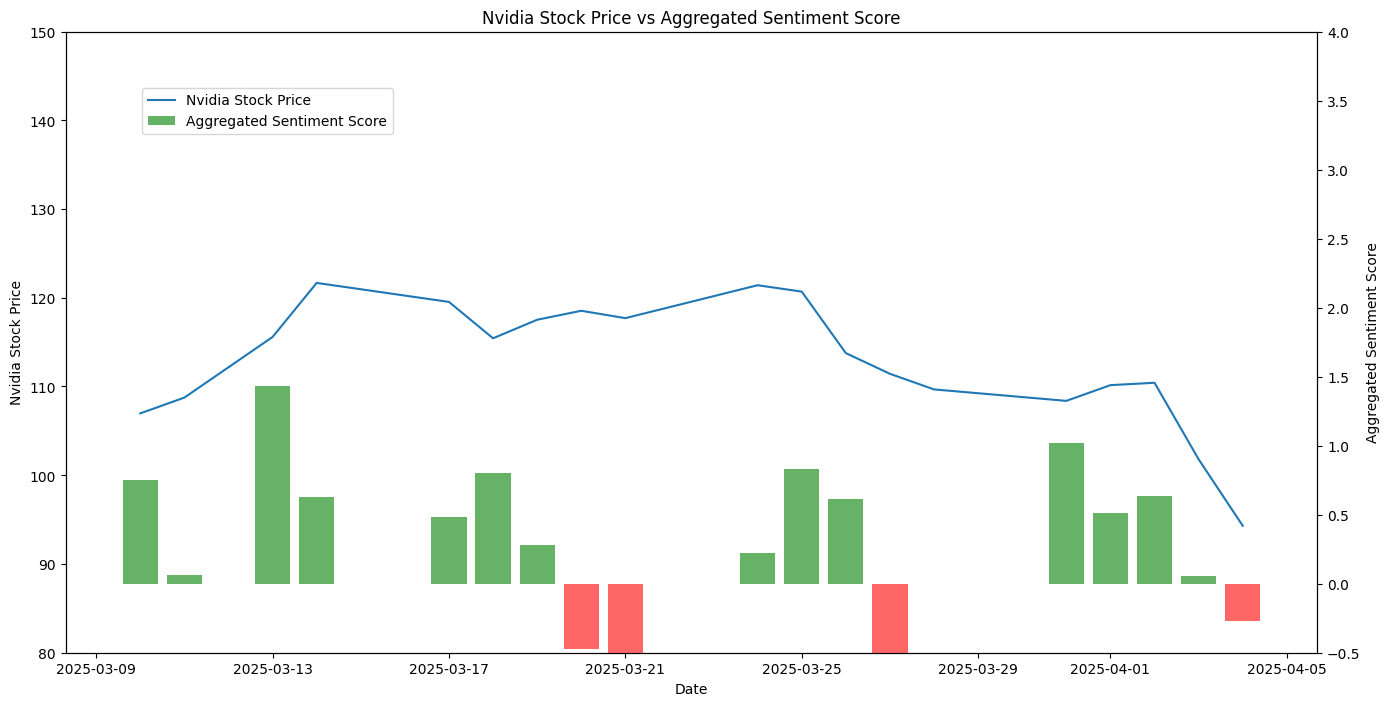

In [13]:
# Convert dates to datetime format
news_data['date'] = pd.to_datetime(news_data['date']).dt.date
stock_data['Date'] = pd.to_datetime(stock_data['Date']).dt.date

# Aggregate sentiment scores by date
aggregated_sentiment = news_data.groupby('date')['sentiment_score'].sum().reset_index()

# Merge stock data with aggregated sentiment scores
combined_data = pd.merge(stock_data, aggregated_sentiment, left_on='Date', right_on='date', how='inner')

# Visualize the data with a secondary y-axis and bar plot for aggregated sentiment scores
fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.set_xlabel('Date')
ax1.set_ylabel('Nvidia Stock Price')
ax1.plot(combined_data['Date'], combined_data['Close'], label='Nvidia Stock Price')
ax1.tick_params(axis='y')
ax1.set_ylim(80, 150)  # Set the left y-axis range

ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Aggregated Sentiment Score')

# Use different colors for positive and negative bar values
colors = ['green' if val >= 0 else 'red' for val in combined_data['sentiment_score']]
ax2.bar(combined_data['Date'], combined_data['sentiment_score'], label='Aggregated Sentiment Score', color=colors, alpha=0.6)
ax2.tick_params(axis='y')
ax2.set_ylim(-0.5, 4)  # Set the right y-axis range

fig.tight_layout()
plt.title('Nvidia Stock Price vs Aggregated Sentiment Score')
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))
plt.show()

In [14]:
# Merging stock data with news data
news_data['date'] = pd.to_datetime(news_data['date']).dt.date
stock_data['Date'] = pd.to_datetime(stock_data['Date']).dt.date


In [16]:
# Find the most influential news item for each day (based on absolute sentiment score)
def find_most_influential_news(group):
    return group.loc[abs(group['sentiment_score']).idxmax()]


In [17]:
most_influential_news = news_data.groupby('date').apply(find_most_influential_news).reset_index(drop=True)
# Merge stock data with the most influential news
combined_data = pd.merge(stock_data, most_influential_news, left_on='Date', right_on='date', how='inner')

/var/folders/b0/44_jwyr55dlff8f4qprlfgj00000gn/T/ipykernel_50376/2057381750.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  most_influential_news = news_data.groupby('date').apply(find_most_influential_news).reset_index(drop=True)


In [18]:
combined_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,headline,clean_headlines,sentiment_score
0,2025-03-10,109.889891,111.839709,105.450297,106.970161,366487400,0.0,0.0,2025-03-10,RTX 5070 is more like an RTX 4070 Super with m...,RTX like RTX Super multi frame gen,0.7506
1,2025-03-11,106.980159,112.229676,104.760361,108.750000,354865700,0.0,0.0,2025-03-11,Meta Is Ready to Rock Nvidia’s Boat With Its I...,Meta Ready Rock Nvidia Boat AI Chip,0.3612
2,2025-03-13,117.029999,117.760002,113.790001,115.580002,299033100,0.0,0.0,2025-03-13,"It’s Not Half-Life 3, but You Can Soon Replay ...",Soon Replay Best Levels Beautiful New Graphics,0.8442
3,2025-03-14,118.610001,121.879997,118.150002,121.669998,277593500,0.0,0.0,2025-03-14,The RTX 5080 is a great GPU that you probably ...,RTX great GPU probably get right,0.6249
4,2025-03-17,122.739998,122.889999,118.029999,119.529999,255501500,0.0,0.0,2025-03-17,Bless the Modder Who Is Fixing AMD’s Newest GPUs,Bless Modder Fixing AMD Newest GPUs,0.4215
5,2025-03-18,118.000000,119.019997,114.540001,115.430000,299686900,0.0,0.0,2025-03-18,GM taps Nvidia to boost its embattled self-dri...,GM taps Nvidia boost embattled projects,0.4019
6,2025-03-19,117.269997,120.449997,115.680000,117.519997,273426200,0.0,0.0,2025-03-19,Disney is getting into the next-gen robot game...,Disney getting robot game kind cute,0.7506
7,2025-03-20,116.550003,120.199997,116.470001,118.529999,248829700,0.0,0.0,2025-03-20,Nvidia might once again delay the GPU gamers w...,Nvidia might delay GPU gamers want,-0.2500
8,2025-03-21,116.940002,117.989998,115.419998,117.699997,266498500,0.0,0.0,2025-03-21,The RTX 50-series is the worst GPU launch in r...,RTX worst GPU launch recent memory,-0.6249
9,2025-03-24,119.879997,122.220001,119.339996,121.410004,228452500,0.0,0.0,2025-03-24,NVIDIA (NVDA) Breaks Barriers with Advanced AI...,NVIDIA NVDA Breaks Barriers Advanced AI Networ...,0.2500


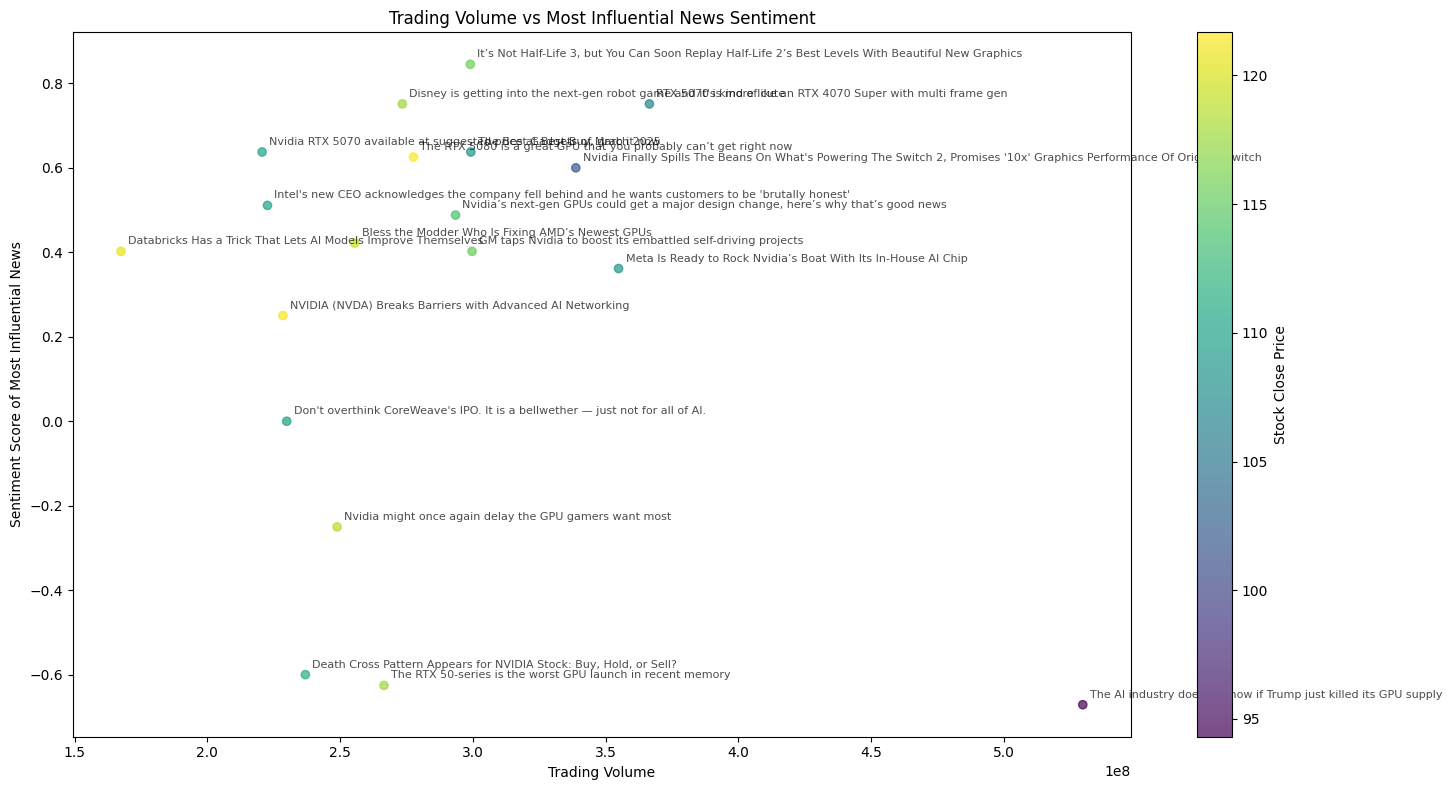

In [19]:
# Create a scatter plot
plt.figure(figsize=(15, 8))
scatter = plt.scatter(combined_data['Volume'], combined_data['sentiment_score'], 
            c=combined_data['Close'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Stock Close Price')
plt.xlabel('Trading Volume')
plt.ylabel('Sentiment Score of Most Influential News')
plt.title('Trading Volume vs Most Influential News Sentiment')

# Annotate some interesting points
for i, row in combined_data.iterrows():
    plt.annotate(row['headline'], 
                 (row['Volume'], row['sentiment_score']),
                 xytext=(5, 5), 
                 textcoords='offset points', 
                 fontsize=8,
                 alpha=0.7)

plt.tight_layout()
plt.show()

In [20]:
# Create a summary DataFrame
summary_df = combined_data[['Date', 'Volume', 'sentiment_score', 'headline']].copy()
summary_df['abs_sentiment'] = abs(summary_df['sentiment_score'])
summary_df = summary_df.sort_values('abs_sentiment', ascending=False)

In [21]:
summary_df

,Date,Volume,sentiment_score,headline,abs_sentiment
2,2025-03-13,299033100,0.8442,"It’s Not Half-Life 3, but You Can Soon Replay ...",0.8442
0,2025-03-10,366487400,0.7506,RTX 5070 is more like an RTX 4070 Super with m...,0.7506
6,2025-03-19,273426200,0.7506,Disney is getting into the next-gen robot game...,0.7506
18,2025-04-04,529707700,-0.6705,The AI industry doesn’t know if Trump just kil...,0.6705
14,2025-03-31,299212700,0.6369,The Best Gadgets of March 2025,0.6369
16,2025-04-02,220601200,0.6369,Nvidia RTX 5070 available at suggested price a...,0.6369
3,2025-03-14,277593500,0.6249,The RTX 5080 is a great GPU that you probably ...,0.6249
8,2025-03-21,266498500,-0.6249,The RTX 50-series is the worst GPU launch in r...,0.6249
12,2025-03-27,236902100,-0.5994,Death Cross Pattern Appears for NVIDIA Stock: ...,0.5994
17,2025-04-03,338769400,0.5994,Nvidia Finally Spills The Beans On What's Powe...,0.5994
